# **Pós-Graduação em Ciência de Dados**

**Avaliação Disciplina LINGUAGEM DE PROGRAMAÇÃO APLICADA PYTHON**

**Análise de Contratos**

**Alunos**


*   Silvio Cesar de Santana
*   Rodrigo de Oliveira Amatuzzi Cypriano



# **Geração de Dados**

In [ ]:
!pip install pandas faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00


**Importar dados**

In [ ]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

**Faker para gerar dados fictícios**

In [ ]:
fake = Faker('pt-BR')

**Gerar dados dos contratos**


Parametros utilizados:

*   Total de contratos: 100
*   Faixa de duração contrato: 3 anos

In [ ]:
quantidade_de_contratos = 100
dados_contrato = []
for _ in range(quantidade_de_contratos):
    numero_contrato = fake.random_int(min=1000, max=9999)
    data_assinatura = fake.date_between(start_date='-3y', end_date='today')
    valor_contrato = round(random.uniform(10000, 50000), 2)
    duracao_contrato = fake.random_int(min=1, max=3)
    nome_fornecedor = fake.company()
    agencia_governamental = fake.company()
    estado_fornecedor = fake.state()
    valor_total_contrato = valor_contrato
    valor_pago = round(random.uniform(0, valor_contrato), 2)
    valor_a_pagar = valor_total_contrato - valor_pago
    data_pagamento_parcela = [fake.date_between_dates(date_start=data_assinatura, date_end=data_assinatura + timedelta(days=365 * duracao_contrato)) for _ in range(duracao_contrato)]

    # Dados Geográficos (gerados aleatoriamente)
    latitude = round(random.uniform (-30, 0), 6)
    longitude = round(random.uniform(-70, -40), 6)

    # Histórico de Pagamentos (lista de pagamentos)
    historico_pagamentos = []
    for i in range(duracao_contrato):
        valor_parcela = round(random.uniform(0, valor_a_pagar), 2)
        data_pagamento = data_pagamento_parcela[i]
        valor_a_pagar -= valor_parcela
        historico_pagamentos.append({'Data Pagamento': data_pagamento, 'Valor': valor_parcela})

    cod_verificador = np.random.choice(['A_a123#','B_b123%','C_c123!','D_d123&','Z_z123@'])
    cod_autorizador = np.random.choice(['1_1clw#','2_2zjt%','3_3wbg!','4_4lky&','9_9tge@'])

    # Adicione os dados à lista
    dados_contrato.append([numero_contrato, data_assinatura, valor_contrato, duracao_contrato, nome_fornecedor, agencia_governamental,estado_fornecedor,
                           valor_total_contrato, valor_pago, valor_a_pagar, data_pagamento_parcela, latitude, longitude, historico_pagamentos, cod_verificador, cod_autorizador])

**DataFrame a partir dos dados**

In [ ]:
df = pd.DataFrame(dados_contrato, columns=["Número do contrato", "Data de assinatura do contrato", "Valor do contrato",
                                           "Duração do contrato", "Nome da empresa ou fornecedor contratado",
                                           "Nome da agência governamental","Estado do fornecedor", "Valor total do contrato",
                                           "Valor pago até o momento", "Valor a ser pago no futuro",
                                           "Data de pagamento de parcelas", "Latitude", "Longitude", "Histórico de Pagamentos", 'Verificador', 'Autorizador'])


**DataFrame em um arquivo CSV**

In [ ]:
df.to_csv('dados_contrato.csv', index=False)

In [ ]:
df

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Estado do fornecedor,Valor total do contrato,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos,Verificador,Autorizador
0,5753,2021-08-04,23492.32,1,Peixoto,Cardoso - EI,Tocantins,23492.32,874.04,577.53,[2021-09-23],-13.590523,-44.489495,"[{'Data Pagamento': 2021-09-23, 'Valor': 22040...",D_d123&,9_9tge@
1,4207,2023-07-06,32388.12,2,Santos,da Rosa,Mato Grosso,32388.12,9468.73,690.23,"[2023-07-13, 2024-02-07]",-8.756260,-44.218836,"[{'Data Pagamento': 2023-07-13, 'Valor': 20498...",C_c123!,9_9tge@
2,1794,2021-08-16,19895.81,1,Oliveira,Cardoso,Paraná,19895.81,19305.71,54.78,[2022-05-08],-5.565386,-42.505016,"[{'Data Pagamento': 2022-05-08, 'Valor': 535.32}]",A_a123#,9_9tge@
3,1385,2021-11-01,17822.97,1,Lima,Silveira Porto S/A,Mato Grosso,17822.97,48.70,16980.03,[2022-02-25],-0.124051,-65.799467,"[{'Data Pagamento': 2022-02-25, 'Valor': 794.24}]",B_b123%,9_9tge@
4,6163,2022-11-05,13036.06,1,Gomes,Costa - EI,Goiás,13036.06,4038.16,2387.70,[2023-07-08],-3.992481,-53.297595,"[{'Data Pagamento': 2023-07-08, 'Valor': 6610.2}]",Z_z123@,3_3wbg!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2414,2020-11-13,40708.69,1,Caldeira,da Luz Barbosa - EI,Goiás,40708.69,26129.07,4088.00,[2021-08-17],-3.516852,-61.931952,"[{'Data Pagamento': 2021-08-17, 'Valor': 10491...",A_a123#,1_1clw#
96,9850,2022-08-19,33684.99,3,Dias,Mendes,Rondônia,33684.99,12374.96,7665.15,"[2025-04-12, 2023-05-29, 2025-01-23]",-28.392464,-56.118310,"[{'Data Pagamento': 2025-04-12, 'Valor': 1116....",C_c123!,2_2zjt%
97,6223,2023-09-25,42811.01,3,Porto,Monteiro,Pará,42811.01,36777.60,1317.76,"[2026-01-05, 2024-03-01, 2024-07-17]",-23.272189,-63.859119,"[{'Data Pagamento': 2026-01-05, 'Valor': 2158....",B_b123%,3_3wbg!
98,1943,2023-02-02,26574.08,1,Duarte - ME,Monteiro - EI,Goiás,26574.08,7829.31,14422.25,[2023-06-22],-28.496433,-67.740844,"[{'Data Pagamento': 2023-06-22, 'Valor': 4322....",D_d123&,3_3wbg!


# **Analisar Contratos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dados do arquivo CSV**

In [ ]:
dados_contrato = pd.read_csv('dados_contrato.csv')

**Exibir as primeiras linhas do DataFrame para verificar os dados**

In [ ]:
dados_contrato.head()

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Estado do fornecedor,Valor total do contrato,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos,Verificador,Autorizador
0,5753,2021-08-04,23492.32,1,Peixoto,Cardoso - EI,Tocantins,23492.32,874.04,577.53,"[datetime.date(2021, 9, 23)]",-13.590523,-44.489495,"[{'Data Pagamento': datetime.date(2021, 9, 23)...",D_d123&,9_9tge@
1,4207,2023-07-06,32388.12,2,Santos,da Rosa,Mato Grosso,32388.12,9468.73,690.23,"[datetime.date(2023, 7, 13), datetime.date(202...",-8.756260,-44.218836,"[{'Data Pagamento': datetime.date(2023, 7, 13)...",C_c123!,9_9tge@
2,1794,2021-08-16,19895.81,1,Oliveira,Cardoso,Paraná,19895.81,19305.71,54.78,"[datetime.date(2022, 5, 8)]",-5.565386,-42.505016,"[{'Data Pagamento': datetime.date(2022, 5, 8),...",A_a123#,9_9tge@
3,1385,2021-11-01,17822.97,1,Lima,Silveira Porto S/A,Mato Grosso,17822.97,48.70,16980.03,"[datetime.date(2022, 2, 25)]",-0.124051,-65.799467,"[{'Data Pagamento': datetime.date(2022, 2, 25)...",B_b123%,9_9tge@
4,6163,2022-11-05,13036.06,1,Gomes,Costa - EI,Goiás,13036.06,4038.16,2387.70,"[datetime.date(2023, 7, 8)]",-3.992481,-53.297595,"[{'Data Pagamento': datetime.date(2023, 7, 8),...",Z_z123@,3_3wbg!




*   **Análise exploratória simples**
*   **Estatísticas descritivas dos valores dos contratos**



In [ ]:
estatisticas_contratos = dados_contrato[['Valor do contrato', 'Valor total do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']].describe()
print(estatisticas_contratos)

       Valor do contrato  Valor total do contrato  Valor pago até o momento  \
count         100.000000               100.000000                100.000000   
mean        31402.360500             31402.360500              14931.581300   
std         11209.134691             11209.134691              11108.770922   
min         10029.020000             10029.020000                 48.700000   
25%         21389.970000             21389.970000               5761.715000   
50%         32596.120000             32596.120000              12904.095000   
75%         40510.892500             40510.892500              21910.017500   
max         49697.690000             49697.690000              45109.730000   

       Valor a ser pago no futuro  
count                  100.000000  
mean                  5176.533000  
std                   7188.165436  
min                      0.770000  
25%                    451.000000  
50%                   1828.970000  
75%                   6753.252500  


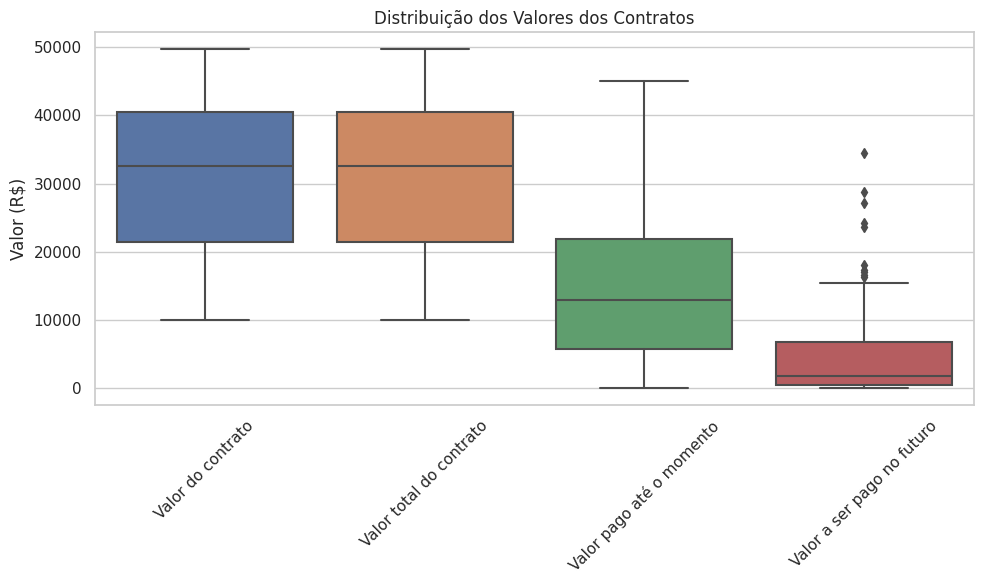

In [ ]:
# Visualização dos valores dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=dados_contrato[['Valor do contrato', 'Valor total do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']])
plt.title('Distribuição dos Valores dos Contratos')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

**Visualização da localização geográfica dos contratos**

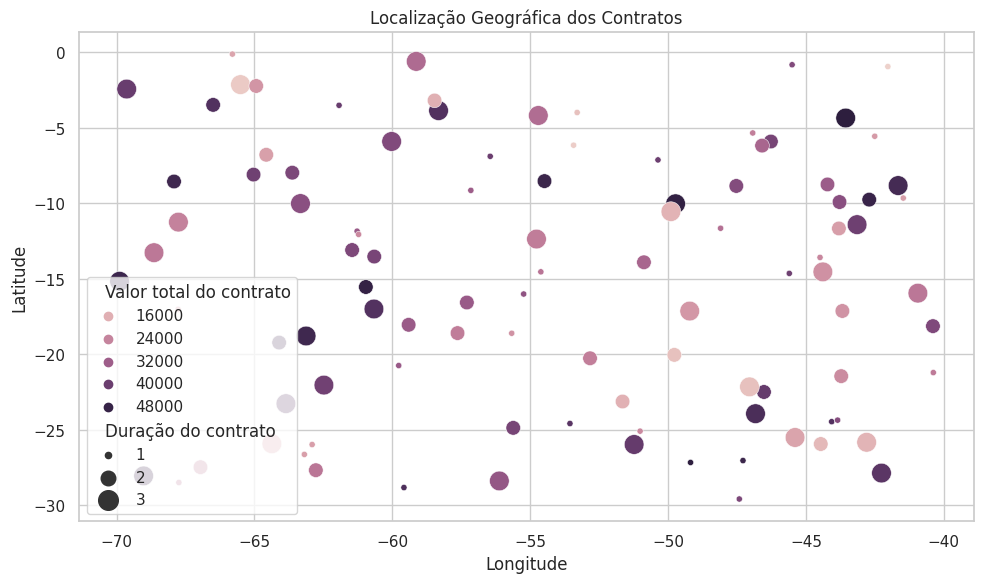

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=dados_contrato, x='Longitude', y='Latitude', hue='Valor total do contrato', size='Duração do contrato', sizes=(20, 200))
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

**Exemplo de análise adicional: Correlação entre variáveis**

<ipython-input-225-d62044239887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_contrato.corr()


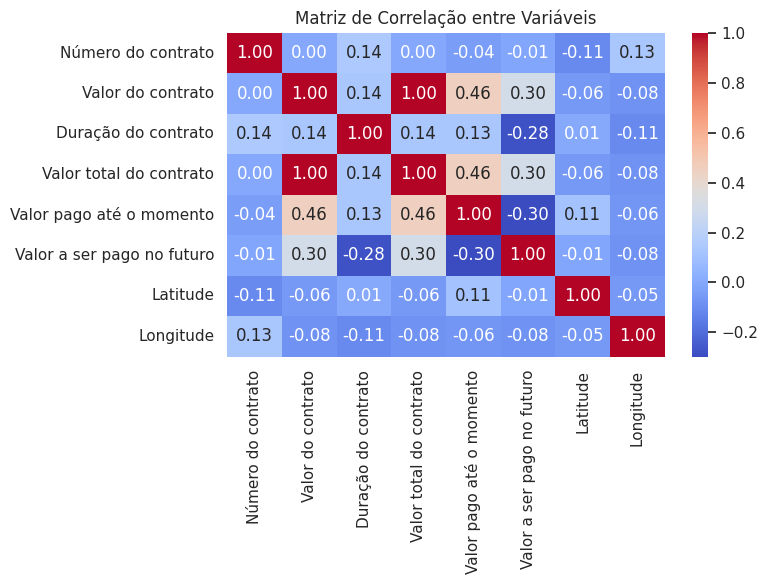

In [ ]:
correlacao = dados_contrato.corr()
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.heatmap(data=correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()

plt.show()

# **Exercício**

**Faça uma análise do histórico de pagamentos. Sua análise precisa de recursos gráficos e responder as seguintes perguntas:**



1.   **Quais são os principais fornecedores?**
2.   **Quais regiões receberam mais verbas ?**
3.   **Quanto falta para pagar de cada contrato?**
4.   **Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?**
5.   **Visualização da distribuição da duração dos contratos**
6.   **Fazer uma análise com regressão linear sobre verbas**



In [ ]:
estatisticas_contratos = dados_contrato[['Valor total do contrato']].describe()
print(estatisticas_contratos)

       Valor total do contrato
count               100.000000
mean              31402.360500
std               11209.134691
min               10029.020000
25%               21389.970000
50%               32596.120000
75%               40510.892500
max               49697.690000


**3 Fornecedores com maiores contratos (Valores)**

In [ ]:
df.sort_values(['Valor total do contrato', 'Duração do contrato'], ascending=[False, False], inplace=True)
df.iloc[:, [4,7,3]].head(3)

,Nome da empresa ou fornecedor contratado,Valor total do contrato,Duração do contrato
54,Freitas S/A,49697.69,3
68,Santos,49413.76,1
36,Barbosa,48748.96,3


**3 Fornecedores com maiores contratos (Duração)**

In [ ]:
df.sort_values(['Duração do contrato','Valor total do contrato'], ascending=[False, False], inplace=True)
df.iloc[:, [4,7,3]].head(3)

,Nome da empresa ou fornecedor contratado,Valor total do contrato,Duração do contrato
54,Freitas S/A,49697.69,3
36,Barbosa,48748.96,3
55,Alves S/A,46928.65,3


**Colunas das informações de valores**

In [ ]:
df.iloc[:, [4,7,8,9]]

,Nome da empresa ou fornecedor contratado,Valor total do contrato,Valor pago até o momento,Valor a ser pago no futuro
54,Freitas S/A,49697.69,28893.74,4113.33
36,Barbosa,48748.96,4459.11,28788.45
55,Alves S/A,46928.65,13257.39,3.87
21,Teixeira,46745.12,12095.27,962.88
99,Azevedo e Filhos,46681.54,13308.19,5569.50
...,...,...,...,...
52,Martins,18924.94,17003.16,329.89
3,Lima,17822.97,48.70,16980.03
4,Gomes,13036.06,4038.16,2387.70
43,Pinto da Conceição - EI,10933.33,2129.83,2253.87


**Saldo a pagar de cada contrato**

In [ ]:
dados_contrato['Saldo a pagar']= (dados_contrato['Valor total do contrato']- (dados_contrato['Valor pago até o momento']+ dados_contrato['Valor a ser pago no futuro']))
dados_contrato.iloc[:, [0,4,16]]

,Número do contrato,Nome da empresa ou fornecedor contratado,Saldo a pagar
0,5753,Peixoto,22040.75
1,4207,Santos,22229.16
2,1794,Oliveira,535.32
3,1385,Lima,794.24
4,6163,Gomes,6610.20
...,...,...,...
95,2414,Caldeira,10491.62
96,9850,Dias,13644.88
97,6223,Porto,4715.65
98,1943,Duarte - ME,4322.52


**Exibindo estados e valores dos contratos**

In [ ]:
dados_contrato.iloc[:, [6,7]]

,Estado do fornecedor,Valor total do contrato
0,Tocantins,23492.32
1,Mato Grosso,32388.12
2,Paraná,19895.81
3,Mato Grosso,17822.97
4,Goiás,13036.06
...,...,...
95,Goiás,40708.69
96,Rondônia,33684.99
97,Pará,42811.01
98,Goiás,26574.08


**Agrupando por Estados**

**3 estados com maiores verbas**

In [ ]:
agrupados = df.groupby('Estado do fornecedor')['Valor total do contrato'].sum()
agrupados.sort_values(ascending=False).head(3)

Estado do fornecedor
Maranhão    276209.43
Paraná      243332.90
Acre        231693.97
Name: Valor total do contrato, dtype: float64

In [ ]:
# selecionado = dados_contrato["Estado do fornecedor"] == "Roraima"
# filtro = dados_contrato[selecionado]
# filtro.iloc[:, [0,6,7]]

**Criando um dataframe auxiliar para armazenar agrupamentos por valor total por estados**

In [ ]:
df_agrup = agrupados.to_csv('dados_contrato_agrup.csv', index=True)

**Lendo/utilizando o dataframe criado acima**

In [ ]:
dados_contrato_agrup = pd.read_csv('dados_contrato_agrup.csv')

In [ ]:
dados_contrato_agrup


,Estado do fornecedor,Valor total do contrato
0,Acre,231693.97
1,Alagoas,60952.79
2,Amapá,98035.41
3,Amazonas,137207.24
4,Bahia,125952.60
5,Ceará,75383.86
6,Distrito Federal,44536.82
7,Espírito Santo,34294.19
8,Goiás,138575.46
9,Maranhão,276209.43


**Exibindo os 3 estados com maiores verbas**

In [ ]:
dados_contrato_agrup.sort_values(by="Valor total do contrato" ,ascending=False).head(3)

,Estado do fornecedor,Valor total do contrato
9,Maranhão,276209.43
13,Paraná,243332.90
0,Acre,231693.97


**Visualização do Total acumuladado por Estado**

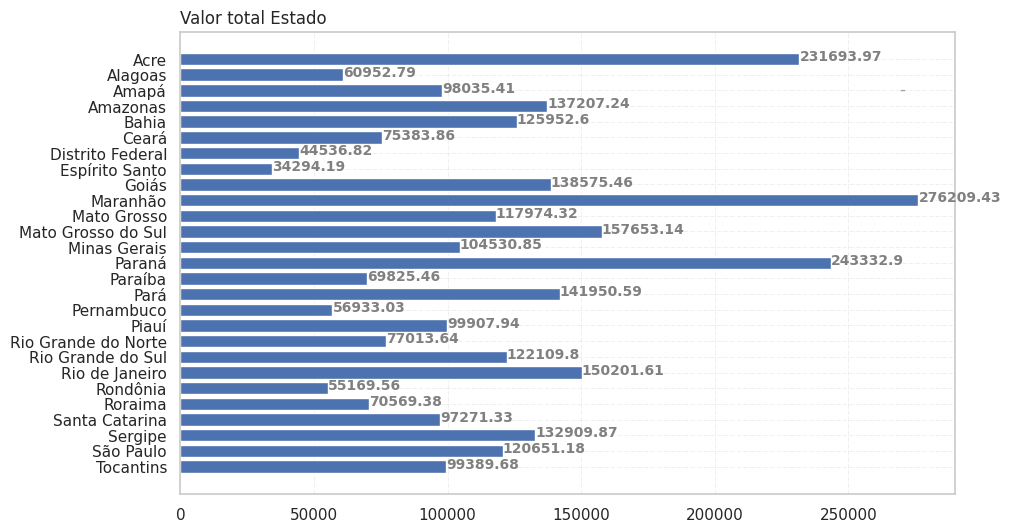

In [ ]:
estados = dados_contrato_agrup[u'Estado do fornecedor']
vlr_acm_estado = dados_contrato_agrup[('Valor total do contrato')]

# Figure Size
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de Barras Horizontais
ax.barh(estados, vlr_acm_estado)
ax
# Add x, y gridlines
ax.grid( color='grey',
		linestyle='-.', linewidth=0.45,
		alpha=0.2)

# Mostra os valores no topo das barras
ax.invert_yaxis()

# Exibir as anotações nas barras
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize=10, fontweight='bold',
			color='grey')

# Titulo
ax.set_title('Valor total Estado',
			loc='left', )

# Marca d'agua
fig.text(0.85, 0.8, '-', fontsize=12,
		color='grey', ha='right', va='top',
		alpha=0.7)

df = dados_contrato_agrup.sort_values(by="Valor total do contrato" ,ascending=False)
#df.plot()

**Colunas de controle para verificação de fraude**


*   Verificador(código do responsável pela verificação das informações dos pagamentos
*   Autorizador (código do responsável pela autorização dos contratos)


**Exibindo colunas de controle**

In [ ]:
dados_contrato.iloc[:, [0,4,14,15]]

,Número do contrato,Nome da empresa ou fornecedor contratado,Verificador,Autorizador
0,5753,Peixoto,D_d123&,9_9tge@
1,4207,Santos,C_c123!,9_9tge@
2,1794,Oliveira,A_a123#,9_9tge@
3,1385,Lima,B_b123%,9_9tge@
4,6163,Gomes,Z_z123@,3_3wbg!
...,...,...,...,...
95,2414,Caldeira,A_a123#,1_1clw#
96,9850,Dias,C_c123!,2_2zjt%
97,6223,Porto,B_b123%,3_3wbg!
98,1943,Duarte - ME,D_d123&,3_3wbg!


**Visualização das coordenadas dos contratos**

**Utilizando geopandas**

In [ ]:
!pip install geodatasets

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [ ]:
gdf = geopandas.GeoDataFrame(
    dados_contrato, geometry=geopandas.points_from_xy(dados_contrato.Longitude, dados_contrato.Latitude), crs="EPSG:4674"
)

In [ ]:
print(gdf.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                7641                     2023-07-08           16794.05   
1                1030                     2021-11-25           39750.40   
2                8913                     2022-01-16           13916.46   
3                7181                     2021-02-12           14505.34   
4                6072                     2022-08-11           16927.83   

   Duração do contrato Nome da empresa ou fornecedor contratado  \
0                    2                                    Pires   
1                    3                     Farias Rezende Ltda.   
2                    3                                    Nunes   
3                    2                                   Santos   
4                    1                                  da Rosa   

  Nome da agência governamental Estado do fornecedor  Valor total do contrato  \
0                       Ribeiro                 Pará             

**Visualização das coordenadas ( Mapa America do Sul/Brasil)**

<Figure size 1000x600 with 0 Axes>

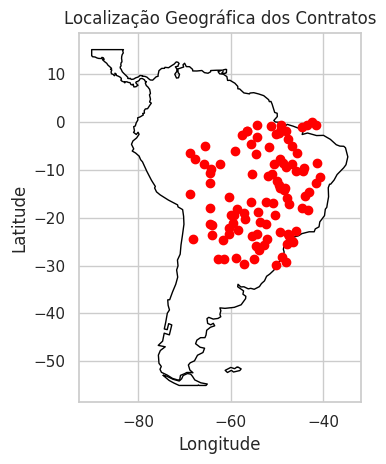

In [ ]:
plt.figure(figsize=(10, 6))
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red")
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

**Verificando Histórico de pagamentos**

In [ ]:
hist_pgto = dados_contrato.iloc[:, [4,13]]
hist_pgto

,Nome da empresa ou fornecedor contratado,Histórico de Pagamentos
0,Pires,"[{'Data Pagamento': datetime.date(2024, 5, 19)..."
1,Farias Rezende Ltda.,"[{'Data Pagamento': datetime.date(2024, 7, 18)..."
2,Nunes,"[{'Data Pagamento': datetime.date(2023, 11, 2)..."
3,Santos,"[{'Data Pagamento': datetime.date(2022, 1, 18)..."
4,da Rosa,"[{'Data Pagamento': datetime.date(2022, 12, 31..."
...,...,...
95,Gomes,"[{'Data Pagamento': datetime.date(2025, 1, 24)..."
96,Vieira,"[{'Data Pagamento': datetime.date(2025, 7, 6),..."
97,Novaes e Filhos,"[{'Data Pagamento': datetime.date(2021, 9, 9),..."
98,Carvalho Peixoto e Filhos,"[{'Data Pagamento': datetime.date(2024, 12, 23..."


In [ ]:
from geopandas.base import DataFrame
import matplotlib.pyplot as plt
import numpy as np

**REGRESSÃO LINEAR**

**Importando sklearn**

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
dados_contrato

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Estado do fornecedor,Valor total do contrato,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos
0,7419,2019-07-31,37658.80,5,Nascimento Nogueira S.A.,Moraes,Mato Grosso,37658.80,246.12,243.96,"[datetime.date(2022, 6, 29), datetime.date(202...",-17.864251,-62.978936,"[{'Data Pagamento': datetime.date(2022, 6, 29)..."
1,4028,2019-02-09,47520.43,5,Souza,da Paz - EI,Ceará,47520.43,39456.22,35.57,"[datetime.date(2022, 10, 30), datetime.date(20...",-23.005665,-43.139980,"[{'Data Pagamento': datetime.date(2022, 10, 30..."
2,6089,2021-04-09,42556.36,7,Alves,Nogueira,Pernambuco,42556.36,37188.50,139.71,"[datetime.date(2023, 10, 20), datetime.date(20...",-4.198104,-61.419199,"[{'Data Pagamento': datetime.date(2023, 10, 20..."
3,9983,2023-01-04,10362.74,4,Lopes Ribeiro - ME,Lima,Amapá,10362.74,4899.45,961.81,"[datetime.date(2026, 11, 9), datetime.date(202...",-11.923914,-53.893634,"[{'Data Pagamento': datetime.date(2026, 11, 9)..."
4,9934,2022-05-06,47425.05,10,Dias,Peixoto,Maranhão,47425.05,14888.94,0.76,"[datetime.date(2023, 12, 27), datetime.date(20...",-10.978099,-56.512620,"[{'Data Pagamento': datetime.date(2023, 12, 27..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7901,2022-06-28,49318.12,5,Novaes Pires e Filhos,Rodrigues Alves e Filhos,Rio de Janeiro,49318.12,49083.14,63.30,"[datetime.date(2025, 2, 11), datetime.date(202...",-16.100523,-61.276101,"[{'Data Pagamento': datetime.date(2025, 2, 11)..."
96,8519,2017-11-01,26633.97,6,Novaes,Gonçalves,Acre,26633.97,13803.25,3.28,"[datetime.date(2021, 4, 6), datetime.date(2019...",-16.618117,-45.735956,"[{'Data Pagamento': datetime.date(2021, 4, 6),..."
97,5220,2020-06-11,26611.73,9,da Rosa,Cavalcanti - EI,Sergipe,26611.73,7960.42,44.36,"[datetime.date(2025, 2, 24), datetime.date(202...",-7.967099,-57.279388,"[{'Data Pagamento': datetime.date(2025, 2, 24)..."
98,6983,2014-05-04,49141.57,3,Barbosa - EI,da Cruz - ME,Mato Grosso do Sul,49141.57,38853.87,53.55,"[datetime.date(2016, 5, 8), datetime.date(2016...",-19.169570,-50.057019,"[{'Data Pagamento': datetime.date(2016, 5, 8),..."


**Separando Dados de treino e teste**

In [ ]:
X = dados_contrato[['Valor total do contrato']]
y = dados_contrato[['Saldo a pagar']]

_X_train = X[:-20]
_X_test = X[-20:]

# Split the targets into training/testing sets
_y_train = y[:-20]
_y_test = y[-20:]

**Criando modelo**

In [ ]:
regr = linear_model.LinearRegression()

regr.fit(_X_train, _y_train)

_y_pred = regr.predict(_X_test)

**Exibindo coeficientes**

In [ ]:
print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(_y_test, _y_pred))

print("Coefficient of determination: %.2f" % r2_score(_y_test, _y_pred))

Coefficients: 
 [[0.28606944]]
Mean squared error: 92894905.51
Coefficient of determination: 0.26


**Visualizando resultados**

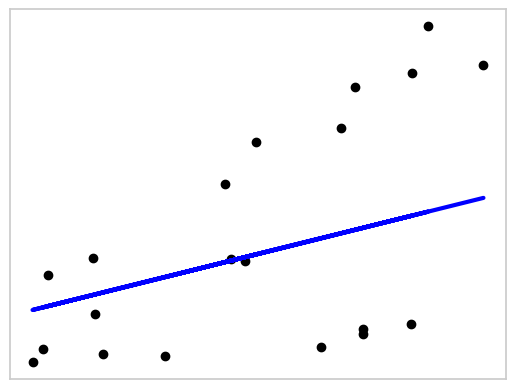

In [ ]:
plt.scatter(_X_test, _y_test, color="black")
plt.plot(_X_test, _y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()